# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## 0. Read data, visualize, basic statistics, understand it

In [1]:
# Import Pandas,Numpy and sklearn package
import pandas as pd
from numpy import nan
import sklearn
import numpy as np

In [6]:
#pip install seaborn
!pip3 install xgboost
import seaborn as sns
#print(sns.__version__)

In [3]:
# sklearn libraries
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [4]:
# Visual libraries
from matplotlib import pyplot as plt

In [5]:
# Import Bank Dataset 
dataset = pd.read_csv("dataset_bank.csv")
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

(10127, 21)

In [8]:
dataset.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 47
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [9]:
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Provide label encoding form pandas api

In [10]:
# Check variable data types

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

print("Numeric columns:\n")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        print(column)
print("----------------------------------\n")        
print("Categorical columns:\n ")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        print(column)

Numeric columns:

CLIENTNUM
Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
----------------------------------

Categorical columns:
 
Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category


In [11]:
# Check for missing data

for column in dataset.columns:
        if dataset[column].isnull().values.any():
            print(column)

In [12]:
# Check for Unknown data

print('\n', dataset['Marital_Status'].value_counts())
print('\n', dataset['Education_Level'].value_counts())
print('\n', dataset['Income_Category'].value_counts())


 Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


## 1. Data preprocessing, normalization, missing data, categorical data

### Explanatory Data Analysis - EDA

### Missing and unknown values

In [13]:
# Raplacement of the 'Unknown' data with NaN 

columns = ['Marital_Status','Education_Level','Income_Category']
dataset[columns]= dataset[columns].replace('Unknown', nan)

In [14]:
# Check for missing values

for column in dataset.columns:
        if dataset[column].isnull().values.any():
            print(column)

Education_Level
Marital_Status
Income_Category


In [15]:
# Replacement of NaN values with 'most_frequent'

simple_imputer = SimpleImputer(strategy='most_frequent')
dataset[columns] = simple_imputer.fit_transform(dataset[columns])


In [16]:
# Drop the column CLIENTNUM                   
dataset = dataset.drop(["CLIENTNUM"], axis = 1)

In [17]:
dataset.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


#### Identifying Outliers with Interquartile Range (IQR)

In [18]:
# Check for 'Months_on_book' column
# The first line of code below prints the skewness value for the 'Months_on_book'
# while the second line prints the summary statistics.

print(dataset['Months_on_book'].skew())
dataset['Months_on_book'].describe()

100.29059631376872


count    1.012700e+04
mean     3.742297e+07
std      3.193385e+09
min     -2.147484e+09
25%      3.100000e+01
50%      3.600000e+01
75%      4.000000e+01
max      3.210000e+11
Name: Months_on_book, dtype: float64

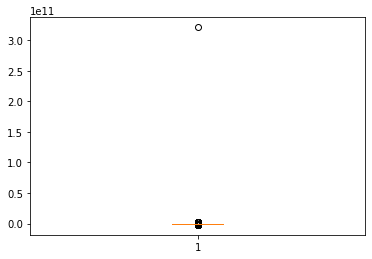

<AxesSubplot:>

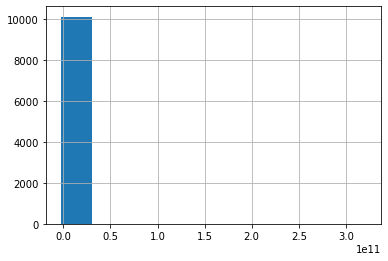

In [18]:
#Identifying Outliers with Visualization

plt.boxplot(dataset["Months_on_book"])
plt.show() 
dataset.Months_on_book.hist()

#The above chart shows that the distribution is right-skewed, 
#and there are extreme higher values at the right of the histogram.

In [19]:
# It is obiviously that 'Months_on_book' feauture has outliers as it is min. value =-2.147484e+09 and max. value =3.210000e+11
#The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between 
# the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1

Q1 = dataset['Months_on_book'].quantile(0.25)
Q3 = dataset['Months_on_book'].quantile(0.75)
IQR = Q3 - Q1

print('The interquartile range (IQR):',IQR)

The interquartile range (IQR): 9.0


#### Outlier Treatment

In [20]:
# The values range and most common value

print("The range between min and max values without outliers is from", 
      dataset['Months_on_book'].quantile(0.002),'up to', dataset['Months_on_book'].quantile(0.99))

print("The most common values are between:", 
      dataset['Months_on_book'].quantile(0.50),'and', dataset['Months_on_book'].quantile(0.95))


The range between min and max values without outliers is from 13.0 up to 56.0
The most common values are between: 36.0 and 50.0


In [21]:
# Replacing Outliers (the extreme values) with median values. 
# It is advised to not use MEAN values as they are affected by outliers.

dataset['Months_on_book'] = np.where(dataset['Months_on_book'] > 56, 36, dataset['Months_on_book'])
dataset['Months_on_book'] = np.where(dataset['Months_on_book'] < 13, 36, dataset['Months_on_book'])
print('New skewness value =', dataset['Months_on_book'].skew())

dataset.describe()

New skewness value = -0.10693284673560063


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.929397,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986301,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [22]:
# Check for missing values and dataset description.

for column in dataset.columns:
        if dataset[column].isnull().values.any():
            print(column)
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34.0,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [23]:
# Check for Categorical and Numeric columns.

categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
numeric_columns=[x for x in dataset.dtypes.index if is_numeric_dtype(dataset[x])]

print ('Categorical columns:\n',categorical_columns)
print('\nNumeric columns:\n',numeric_columns)

Categorical columns:
 ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

Numeric columns:
 ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


Text(0, 0.5, 'Frequency')

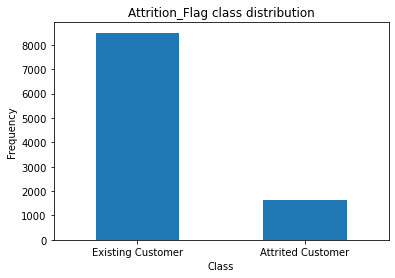

In [24]:
# class  Frequency

labels = ['Existing Customer','Attrited Customer']
classes = pd.value_counts(dataset['Attrition_Flag'], sort = True)
classes.plot(kind = 'bar', rot=0)

plt.title("Attrition_Flag class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

#### SMOTE-Unbalanced dataset

In [ ]:
## Ne go pustaj :)

# print (categorical_columns)
# print(numeric_columns)

# rows = 5
# columns = 3

# figure = plt.figure(figsize=(15,20))
# for idx, col in enumerate(numeric_columns, start=1):
#    col_values = [dataset[col].values]
#    plt_seaborn = sns.distplot(col_values)
#    cell = plt.subplot(5, 3, idx)
#    plt_seaborn.plot()
#    plt.title(col)

In [25]:
class_ExistingCustomer= dataset.query('Attrition_Flag == "Existing Customer"')
class_AttritedCustomer= dataset.query('Attrition_Flag == "Attrited Customer"')

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

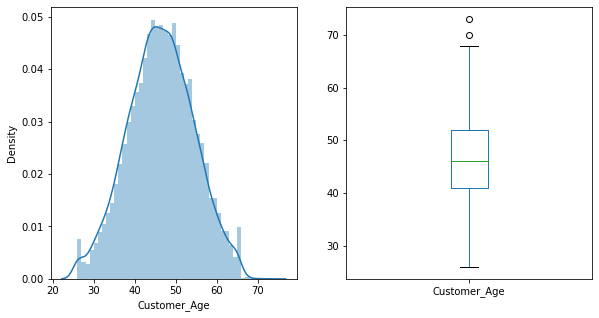

In [26]:
# distribution of Customer_Age
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Customer_Age'], label='Customer_Age')

plt.subplot(132)
dataset['Customer_Age'].plot(kind='box', label="Customer_Age")


<AxesSubplot:title={'center':'Age with Churned or not'}, xlabel='Customer_Age', ylabel='count'>

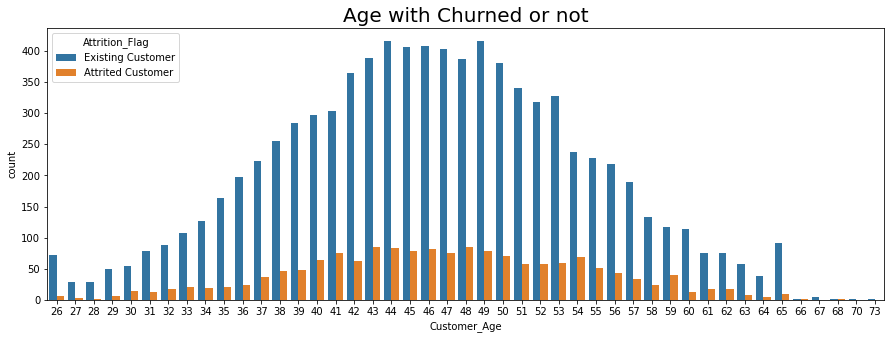

In [27]:

#age = pd.crosstab(dataset['Customer_Age'], dataset['Attrition_Flag'])
plt.figure(figsize = (15,5))
plt.title("Age with Churned or not", fontsize = 20)
sns.countplot(data = dataset, x = dataset["Customer_Age"], hue = "Attrition_Flag")

#dataset.groupby('Customer_Age')["Attrition_Flag"].value_counts().unstack()

#Customer age follows normal distribution , also approximately same proportion of churning customers 
#78% of the customers are in age range between 36-56y, so we have to pay attention to the behavior of the features in this particular range so we may find some pattern for better prediction

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Attrition_Flag,Attrited Customer,Existing Customer
Dependent_count,,
0,135,769
1,269,1569
2,417,2238
3,482,2250
4,260,1314
5,64,360


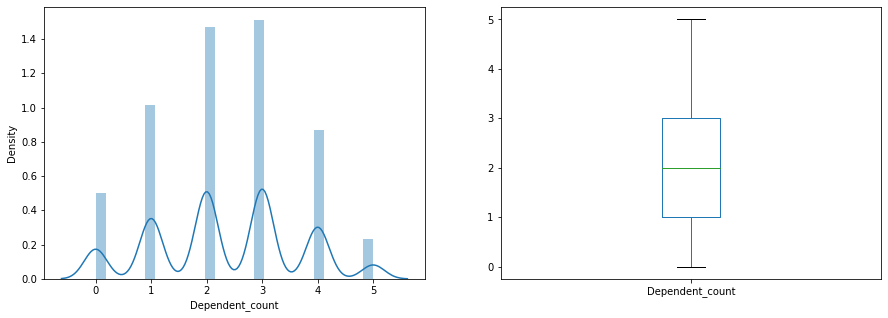

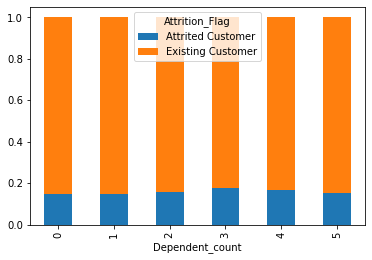

In [28]:
# distribution of Dependent_count(close family size)

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.distplot(dataset['Dependent_count'], label='Dependent_count')

plt.subplot(122)
dataset['Dependent_count'].plot(kind='box', label="Dependent_count")

#plt.subplot(133)
#sns.set(style="darkgrid")
#sns.countplot(x="Customer_Age", hue="Dependent_count", data=dataset)

data= pd.crosstab(dataset['Dependent_count'], dataset['Attrition_Flag'])
data.div(data.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

data 

# The distribution of Dependent counts is fairly normally distributed.
# Аpproximately same proportion of churning customers, not depending on number of dependents (close family size)
# Customers in age groups 36-56 have 2-3 dependents

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


F    5358
M    4769
Name: Gender, dtype: int64

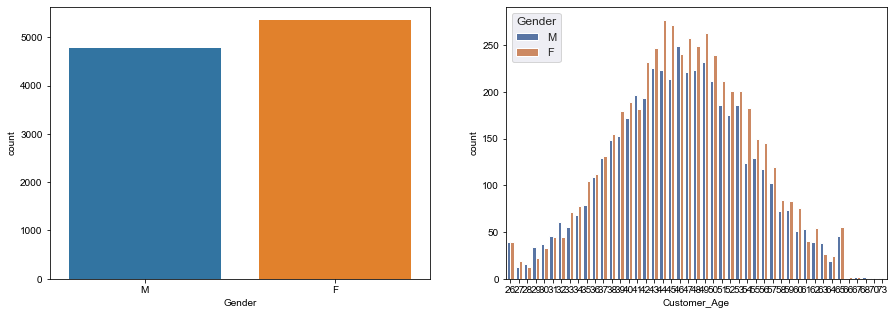

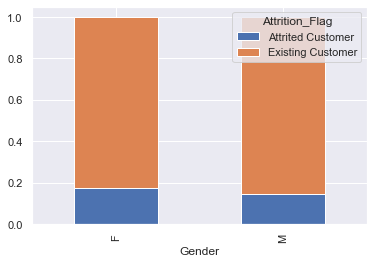

In [29]:
#Gender distribution

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(dataset['Gender'])

plt.subplot(122)
sns.set(style="darkgrid")
sns.countplot(x="Customer_Age", hue="Gender", data=dataset)

gender= pd.crosstab(dataset['Gender'], dataset['Attrition_Flag'])
gender.div(gender.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset['Gender'].value_counts()

# The Bank has more female cusomers than male generally, and also divided by age groups
# Female has a higher but not significent  proportion of attrition compared to males.

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated
Attrition_Flag,,,,,,
Attrited Customer,154,95,743,306,92,237
Existing Customer,859,356,3904,1707,424,1250


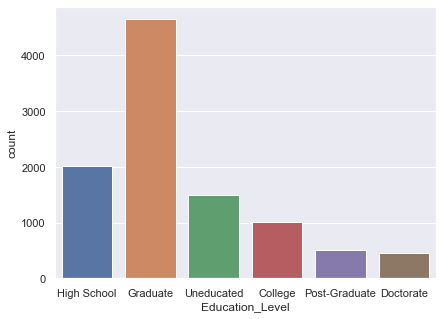

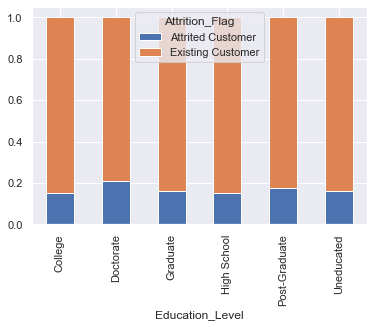

In [53]:
#Education_Level distribution

education = pd.crosstab(dataset['Education_Level'], dataset['Attrition_Flag'])
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(dataset['Education_Level'])

education.div(education.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
dataset.groupby('Attrition_Flag')["Education_Level"].value_counts().unstack()

#Majority of clients have level of eduction high school and graduate

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

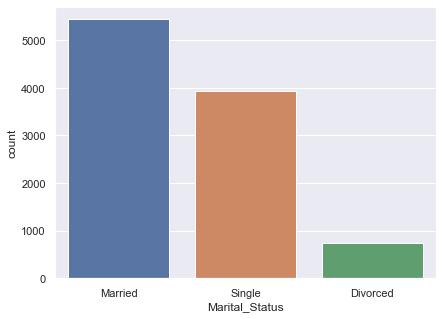

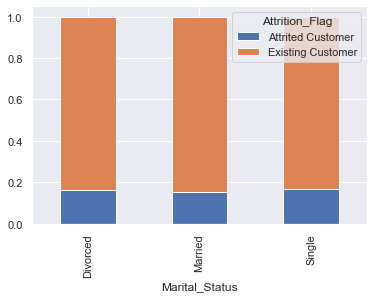

In [55]:
# Marital_Status distribution

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(dataset['Marital_Status'])

marital= pd.crosstab(dataset['Marital_Status'], dataset['Attrition_Flag'])
marital.div(marital.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset['Marital_Status'].value_counts()

#Majority of the dataset is Married or Single, same proprtion of leaving

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K
Attrition_Flag,,,,,
Attrited Customer,126,271,189,242,799
Existing Customer,601,1519,1213,1293,3874


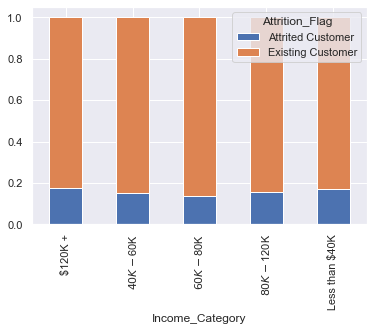

In [32]:
#Income_Category
income= pd.crosstab(dataset['Income_Category'], dataset['Attrition_Flag'])
income.div(income.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset.groupby('Attrition_Flag')["Income_Category"].value_counts().unstack()

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Card_Category,Blue,Gold,Platinum,Silver
Attrition_Flag,,,,
Attrited Customer,1519,21,5,82
Existing Customer,7917,95,15,473


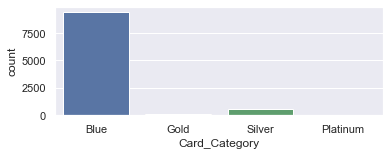

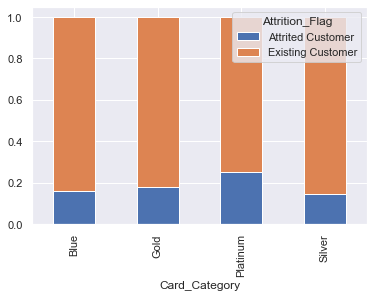

In [33]:
# distribution of Card_Category-
cards= pd.crosstab(dataset['Card_Category'], dataset['Attrition_Flag'])
plt.figure(figsize=(20,2))
plt.subplot(131)
sns.countplot(dataset['Card_Category'])

cards.div(cards.sum(axis=1), axis=0).plot(kind="bar", stacked=True)
dataset.groupby('Attrition_Flag')["Card_Category"].value_counts().unstack()



C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

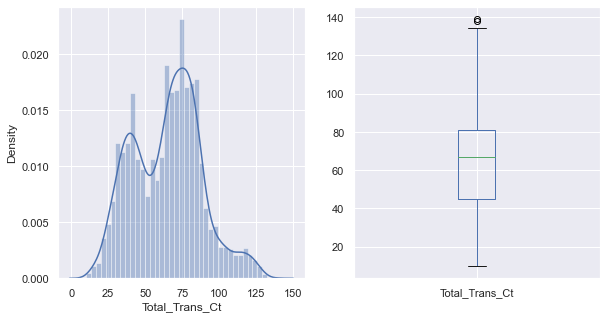

In [35]:
# distribution of Total_Trans_Ct

plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Total_Trans_Ct'], label='Total_Trans_Ct')

plt.subplot(132)
dataset['Total_Trans_Ct'].plot(kind='box', label="Total_Trans_Ct")

#plt.subplot(133)
#sns.boxplot(x = "Customer_Age", y = "Total_Trans_Ct", data=dataset)

# we have some underlying groups in our data

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Months_Inactive_12_mon,0,1,2,3,4,5,6
Attrition_Flag,,,,,,,
Attrited Customer,15,100,505,826,130,32,19
Existing Customer,14,2133,2777,3020,305,146,105


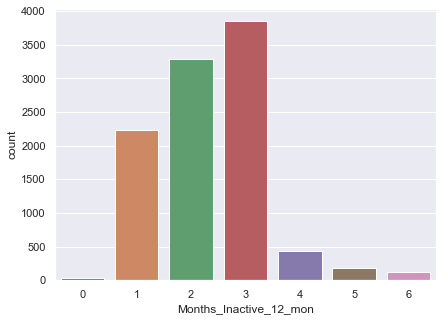

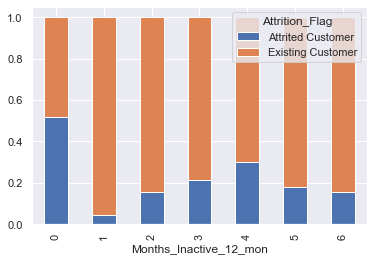

In [63]:
%matplotlib inline

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(dataset['Months_Inactive_12_mon'])

inactive= pd.crosstab(dataset['Months_Inactive_12_mon'], dataset['Attrition_Flag'])
inactive.div(inactive.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

dataset.groupby('Attrition_Flag')["Months_Inactive_12_mon"].value_counts().unstack()

# Most od the clienst were inactive 1-3 months
# Majority of the clients who abandoned the Bank were inactive approximately 4 months or less than a month, 
# so here we have some diversity about inactive months and clients who left

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Total_Relationship_Count,1,2,3,4,5,6
Attrition_Flag,,,,,,
Attrited Customer,233,346,400,225,227,196
Existing Customer,677,897,1905,1687,1664,1670


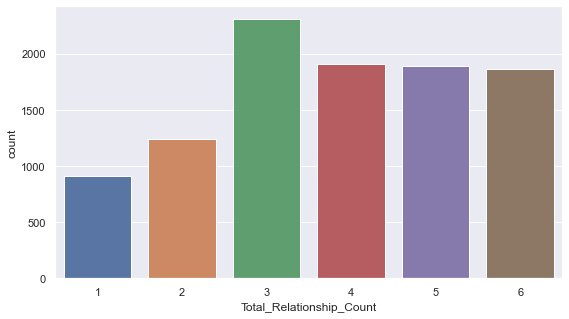

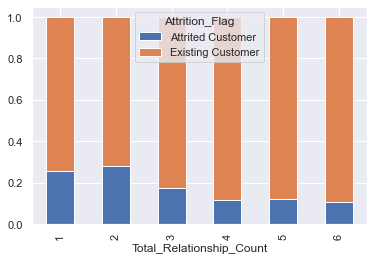

In [65]:
# distribution of Total_Relationship_Count-Total no. of products held by the customer

plt.figure(figsize=(20,5))

plt.subplot(122)
sns.countplot(dataset['Total_Relationship_Count'])

products=pd.crosstab(dataset['Total_Relationship_Count'], dataset['Attrition_Flag'])
products.div(products.sum(axis=1), axis=0).plot(kind="bar", stacked=True)              
products 

dataset.groupby('Attrition_Flag')["Total_Relationship_Count"].value_counts().unstack()

# Majority of the clients held 3 or more products
# Bank clients who held more products stayed in the Bank

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Attrition_Flag,Attrited Customer,Existing Customer
Contacts_Count_12_mon,,
0,7,392
1,108,1391
2,403,2824
3,681,2699
4,315,1077
5,59,117
6,54,0


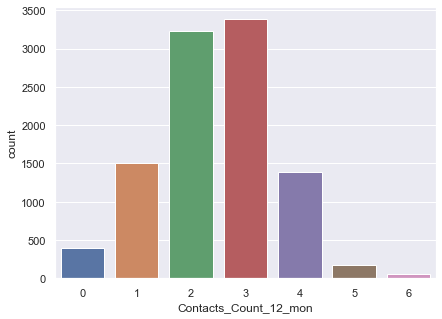

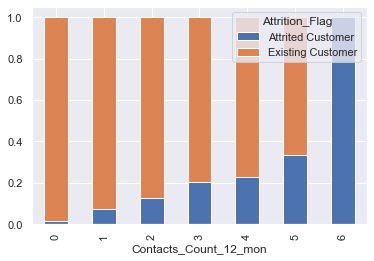

In [66]:
# distribution of Contacts_Count_12_mon- No. of Contacts in the last 12 months

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(dataset['Contacts_Count_12_mon'])

contacts=pd.crosstab(dataset['Contacts_Count_12_mon'], dataset['Attrition_Flag'])
contacts.div(contacts.sum(axis=1), axis=0).plot(kind="bar", stacked=True)              
contacts 

# The attrition class who has a higher No. of Contacts in the last 12 months compared to the existing customers class

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

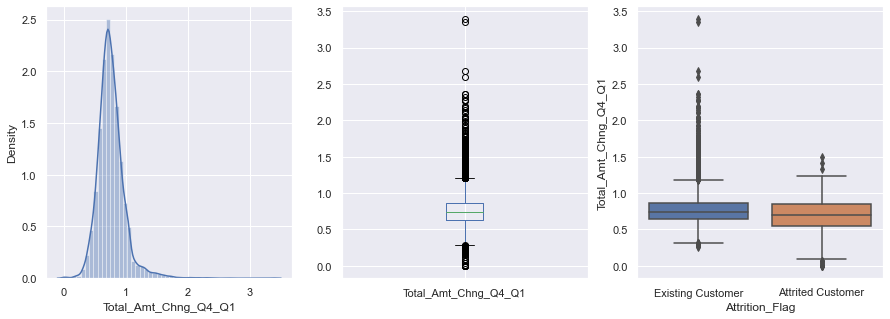

In [68]:
# distribution of Total_Amt_Chng_Q4_Q1(Change in Transaction Amount (Q4 over Q1))

plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Total_Amt_Chng_Q4_Q1'], label='Total_Amt_Chng_Q4_Q1')

plt.subplot(132)
dataset['Total_Amt_Chng_Q4_Q1'].plot(kind='box', label="Total_Amt_Chng_Q4_Q1")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Amt_Chng_Q4_Q1", data=dataset)

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1_norm', ylabel='Density'>

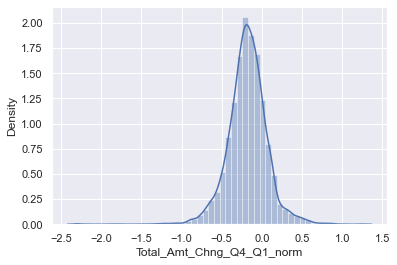

In [82]:
#Log Transform on skewed data Total_Amt_Chng_Q4_Q1

dataset = dataset.assign(Total_Amt_Chng_Q4_Q1_norm = np.log(dataset['Total_Amt_Chng_Q4_Q1']+0.1))
sns.distplot(dataset['Total_Amt_Chng_Q4_Q1_norm'], label='Total_Amt_Chng_Q4_Q1_norm')

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Ct_Chng_Q4_Q1'>

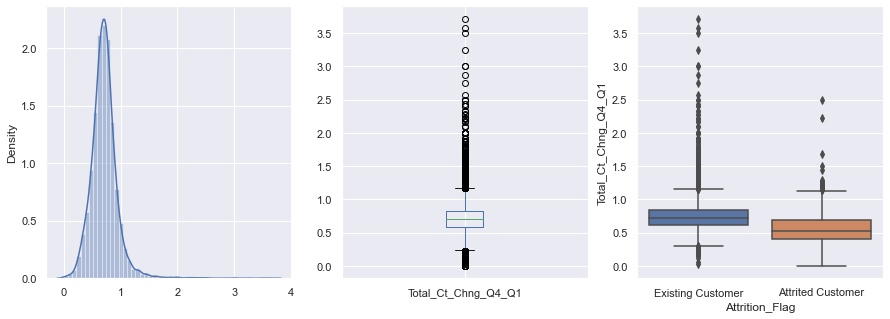

In [41]:
# distribution of Total_Ct_Chng_Q4_Q1-(Change in Transaction Count (Q4 over Q1))

plt.figure(figsize=(15,5))
plt.subplot(131)
Total_Ct_Chng_Q4_Q1 = [dataset['Total_Ct_Chng_Q4_Q1'].values]
sns.distplot(Total_Ct_Chng_Q4_Q1)

plt.subplot(132)
dataset['Total_Ct_Chng_Q4_Q1'].plot(kind='box', label="Total_Ct_Chng_Q4_Q1")
plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Ct_Chng_Q4_Q1", data=dataset)

#The attrition class has a lower Change in Transaction Count compared to the existing customers class

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

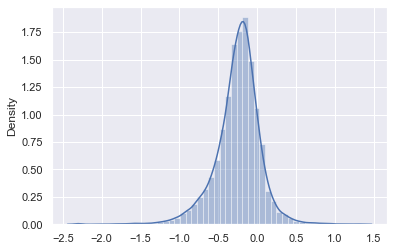

In [69]:
#Log Transform on skewed data Total_Ct_Chng_Q4_Q1

dataset = dataset.assign(Total_Ct_Chng_Q4_Q1_norm = np.log(dataset['Total_Ct_Chng_Q4_Q1']+0.1))

Total_Ct_Chng_Q4_Q1_norm = [dataset['Total_Ct_Chng_Q4_Q1_norm'].values]
sns.distplot(Total_Ct_Chng_Q4_Q1_norm)

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

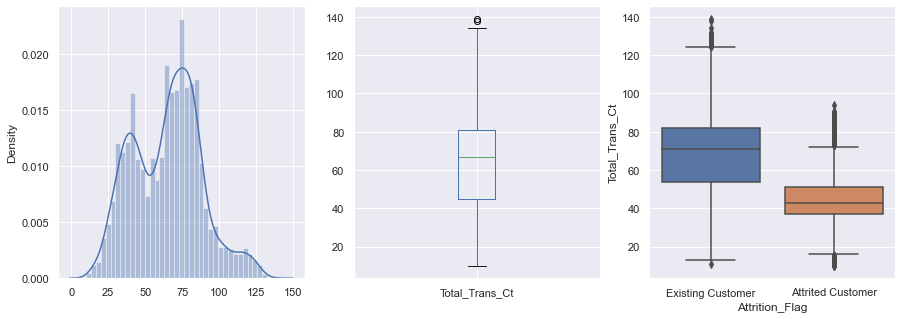

In [70]:
# distribution of Total_Trans_Ct(Total Transaction Count (Last 12 months))
plt.figure(figsize=(15,5))
plt.subplot(131)
Months_on_book = [dataset['Total_Trans_Ct'].values]
sns.distplot(Months_on_book)

plt.subplot(132)
dataset['Total_Trans_Ct'].plot(kind='box', label="Total_Trans_Ct")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Trans_Ct", data=dataset)
#Outliers
#we have some underlying groups in our data
#The attrition class has a lower total transaction count compared to the existing customers class

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

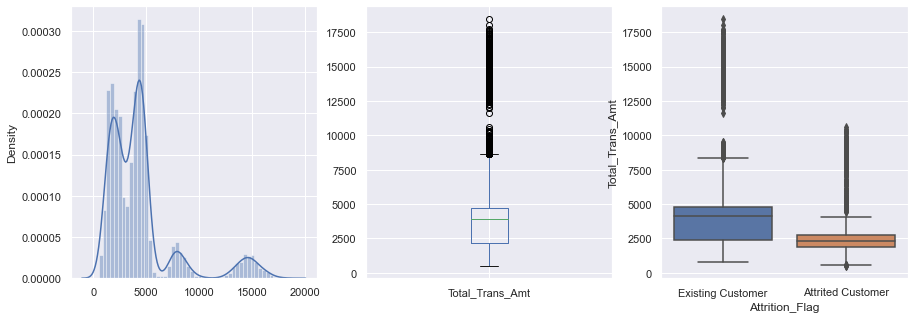

In [71]:
# distribution of Total_Trans_Amt-Total Transaction Amount (Last 12 months)

plt.figure(figsize=(15,5))
plt.subplot(131)
Total_Trans_Amt = [dataset['Total_Trans_Amt'].values]
sns.distplot(Total_Trans_Amt)

plt.subplot(132)
dataset['Total_Trans_Amt'].plot(kind='box', label="Total_Trans_Amt")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Trans_Amt", data=dataset)

#The attrition class has a lower Total Transaction Amount compared to the existing customers class
#we have some underlying groups in our data

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Trans_Amt_norm', ylabel='Density'>

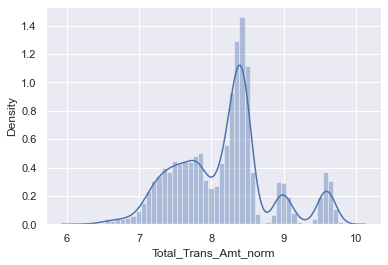

In [72]:
#Log Transform on skewed data Total_Trans_Amt

dataset = dataset.assign(Total_Trans_Amt_norm = np.log(dataset['Total_Trans_Amt']+0.1))
sns.distplot(dataset['Total_Trans_Amt_norm'], label='Total_Trans_Amt')

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

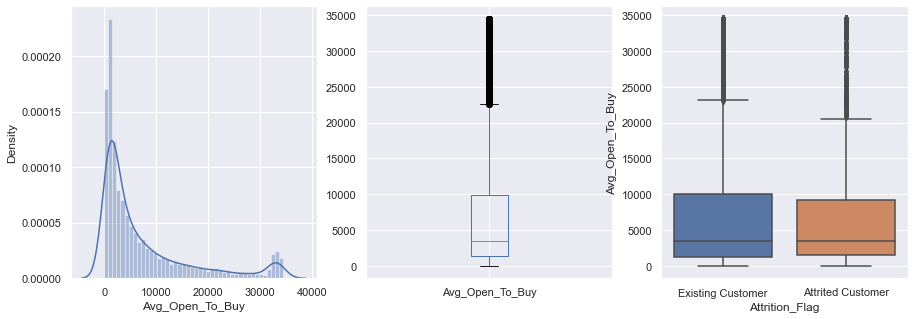

In [73]:
# distribution of Avg_Open_To_Buy
# (The difference between the credit limit assigned to a cardholder account and the present balance on the account)

plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Avg_Open_To_Buy'], label='Avg_Open_To_Buy')

plt.subplot(132)
dataset['Avg_Open_To_Buy'].plot(kind='box', label="Avg_Open_To_Buy")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Avg_Open_To_Buy", data=dataset)

#Customers 

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Open_To_Buy_norm', ylabel='Density'>

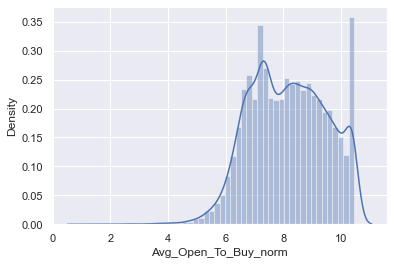

In [74]:
#Log Transform on skewed data Avg_Open_To_Buy

dataset = dataset.assign(Avg_Open_To_Buy_norm = np.log(dataset['Avg_Open_To_Buy']+0.1))
sns.distplot(dataset['Avg_Open_To_Buy_norm'], label='Avg_Open_To_Buy_norm')

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

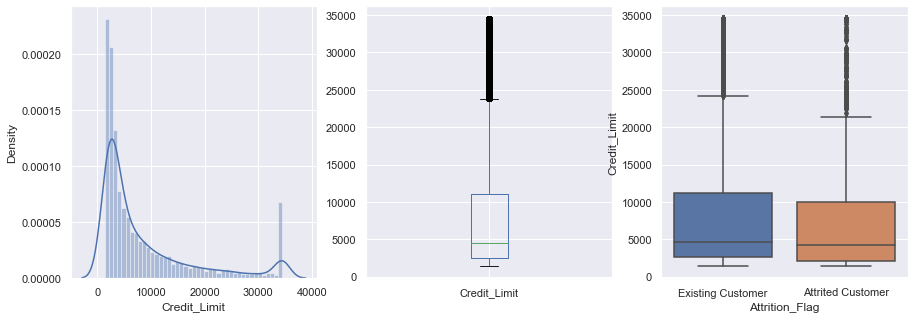

In [75]:
# distribution of Credit_Limit
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Credit_Limit'], label='Credit_Limit')

plt.subplot(132)
dataset['Credit_Limit'].plot(kind='box', label="Credit_Limit")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Credit_Limit", data=dataset)

#skew  to the left ,outliers,same data distribution of churning and existing customers,not significent influence of feature Credit limt to the class

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_Limit_norm', ylabel='Density'>

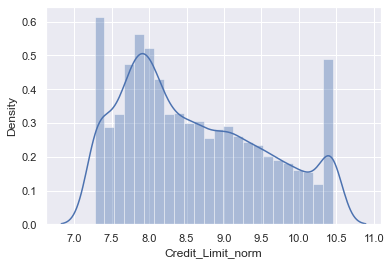

In [76]:

#Log Transform on skewed data Credit_Limit

dataset = dataset.assign(Credit_Limit_norm = np.log(dataset['Credit_Limit']+0.1))
sns.distplot(dataset['Credit_Limit_norm'], label='Credit_Limit_norm')

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

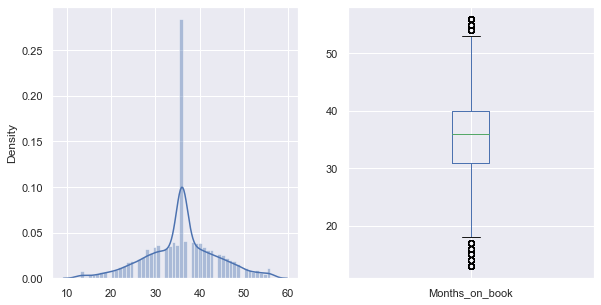

In [77]:
# distribution of Months_on_book 
plt.figure(figsize=(15,5))
plt.subplot(131)
Months_on_book = [dataset['Months_on_book'].values]
sns.distplot(Months_on_book)

plt.subplot(132)
dataset['Months_on_book'].plot(kind='box', label="Months_on_book")

#plt.subplot(133)
#sns.boxplot(x = "Customer_Age", y = "Months_on_book", data=dataset)

# Outliers-done

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

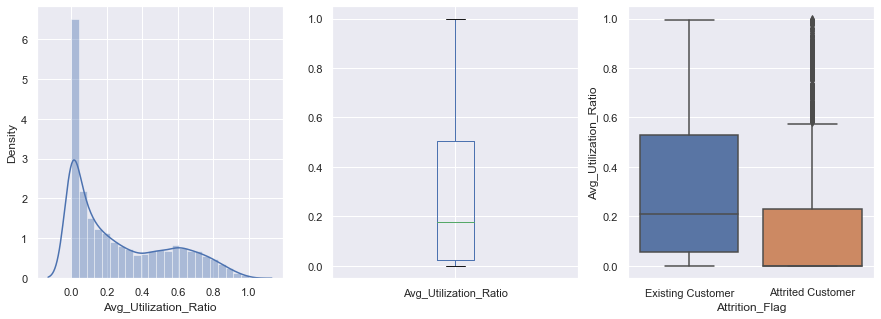

In [78]:
# distribution of Avg_Utilization_Ratio(credit utilization ratio is how much you owe on all your revolving accounts, 
# such as credit cards, compared with your total available credit — expressed as a percentage. 
# It's important because it's one of the biggest factors in your credit score.)
# Experts suggest using no more than 30% of your limits, and less is better. 
# Charging too much on your cards, especially if you max them out, is associated with being a higher credit risk. 
# That’s why running up your cards will lower your score

plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(dataset['Avg_Utilization_Ratio'], label='Avg_Utilization_Ratio')

plt.subplot(132)
dataset['Avg_Utilization_Ratio'].plot(kind='box', label="Avg_Utilization_Ratio")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Avg_Utilization_Ratio", data=dataset)

#Churning customers  most of them have Avg_Utilization_Ratio under 30%, but also significent proportion ( about 20%) are 
# leaving the Bank with higher Avg_Utilization_Ratio Outliers

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Utilization_Ratio_norm', ylabel='Density'>

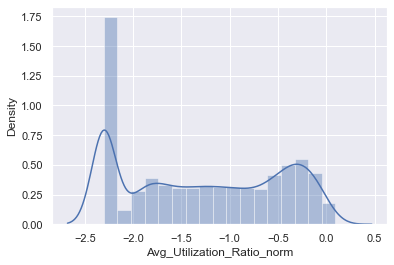

In [79]:
#Log Transform on skewed data

dataset = dataset.assign(Avg_Utilization_Ratio_norm = np.log(dataset['Avg_Utilization_Ratio']+0.1))
sns.distplot(dataset['Avg_Utilization_Ratio_norm'], label='Avg_Utilization_Ratio_norm')

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

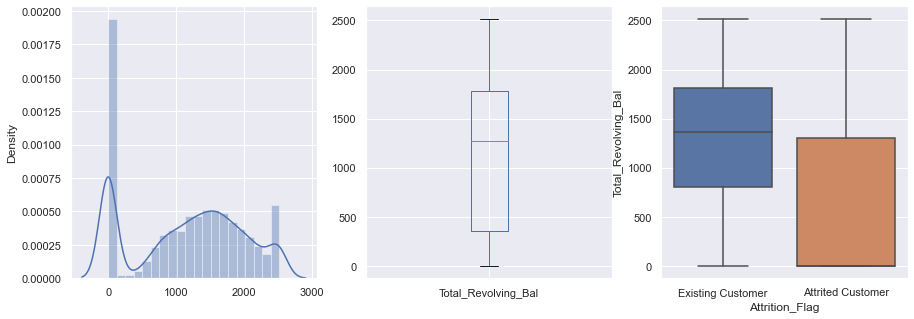

In [80]:
# distribution of Total_Revolving_Bal-Total Revolving Balance on the Credit Card

plt.figure(figsize=(15,5))
plt.subplot(131)
Total_Revolving_Bal = [dataset['Total_Revolving_Bal'].values]
sns.distplot(Total_Revolving_Bal)

plt.subplot(132)
dataset['Total_Revolving_Bal'].plot(kind='box', label="Total_Revolving_Bal")

plt.subplot(133)
sns.boxplot(x = "Attrition_Flag", y = "Total_Revolving_Bal", data=dataset)

#The attrition class has a lower total revolving balance compared to the existing customers class

## Scaling

In [83]:
#RobustScaler

from sklearn.preprocessing import RobustScaler

columns = ['Total_Ct_Chng_Q4_Q1_norm','Credit_Limit_norm','Avg_Open_To_Buy_norm','Total_Amt_Chng_Q4_Q1_norm','Avg_Utilization_Ratio_norm']
transformer = RobustScaler()

dataset[columns] = transformer.fit_transform(dataset[columns])

In [85]:
# #Min-Max Scaler -Age
from sklearn.preprocessing import MinMaxScaler

column = ['Customer_Age']

transformer = MinMaxScaler(feature_range=(0,1))
dataset[column] = transformer.fit_transform(dataset[column])

In [86]:
print("Minimum value of Age is :", dataset['Customer_Age'].min())
print("Maximum value of Age is :", dataset['Customer_Age'].max())

Minimum value of Age is : 0.0
Maximum value of Age is : 1.0


In [87]:
# #Standard Scaler
from sklearn.preprocessing import StandardScaler

column_ = ['Total_Revolving_Bal','Total_Trans_Amt']
transformer = StandardScaler()
dataset[column_] = transformer.fit_transform(dataset[column_])

In [88]:
dataset.describe()
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Ct_Chng_Q4_Q1_norm,Total_Trans_Amt_norm,Avg_Open_To_Buy_norm,Credit_Limit_norm,Avg_Utilization_Ratio_norm,Total_Amt_Chng_Q4_Q1_norm
0,Existing Customer,0.404255,M,3,High School,Married,$60K - $80K,Blue,39.0,5,...,-0.959707,42,1.625,0.061,2.577244,7.042374,0.613957,0.699877,-0.339048,1.990188
1,Existing Customer,0.489362,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,...,-0.916433,33,3.714,0.105,5.247290,7.163250,0.376168,0.406583,-0.187070,2.484302
2,Existing Customer,0.531915,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,...,-0.740982,20,2.333,0.000,3.734496,7.542797,-0.008096,-0.194992,-0.638617,4.310314
3,Existing Customer,0.297872,F,4,High School,Married,Less than $40K,Blue,34.0,3,...,-0.951758,20,2.333,0.760,3.734496,7.065699,-0.734010,-0.216276,0.714920,2.165628
4,Existing Customer,0.297872,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,...,-1.056263,28,2.500,0.000,3.957893,6.704537,0.152269,0.024594,-0.638617,3.687622


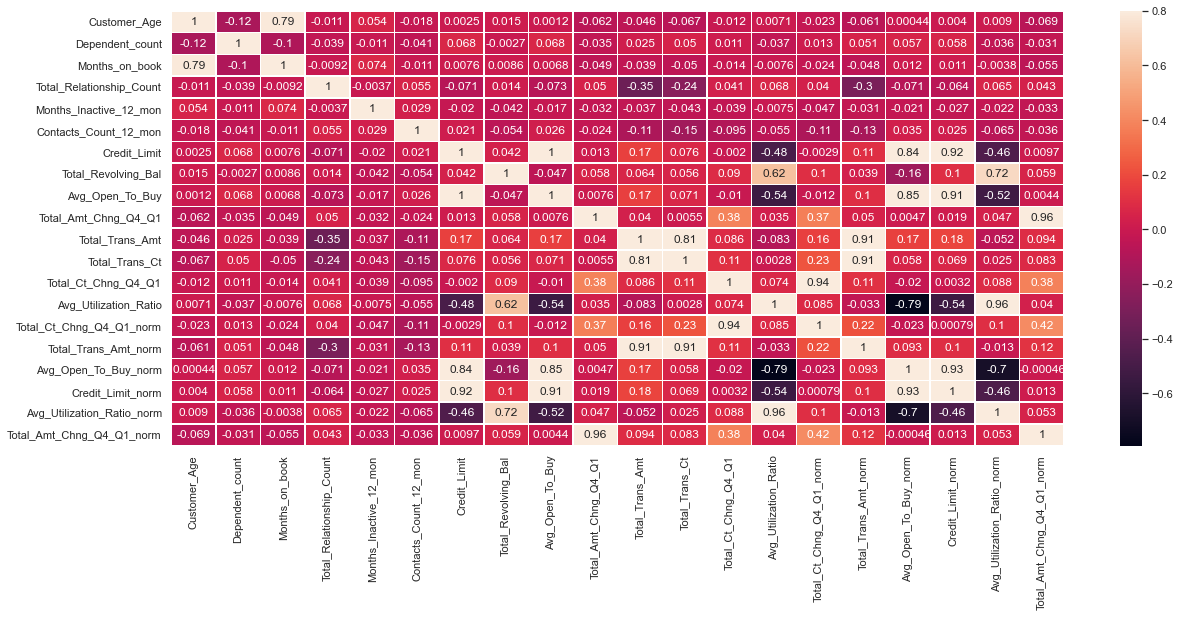

In [89]:
# Heatmap - correlation of features

correlation_matrix = dataset.corr()
top_corr_features = correlation_matrix.index
fig = plt.figure(figsize=(20,8))

sns.heatmap(dataset[top_corr_features].corr(), vmax=0.8, annot=True, linewidths=.5)
plt.show() 

In [90]:
# Calculate skew and sort
# The coefficient of skewness is a measure of asymmetry in the distribution.
# A positive skew indicates a longer tail to the right, while a negative skew indicates a longer tail to the left.
# A perfectly symmetric distribution, like the normal distribution, has a skew equal to zero.

skew_feats = dataset[numeric_columns].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'skew':skew_feats})

skewness

,skew
Total_Ct_Chng_Q4_Q1,2.064031
Total_Trans_Amt,2.041003
Total_Amt_Chng_Q4_Q1,1.732063
Credit_Limit,1.666726
Avg_Open_To_Buy,1.661697
Avg_Utilization_Ratio,0.718008
Months_Inactive_12_mon,0.633061
Total_Trans_Ct,0.153673
Contacts_Count_12_mon,0.011006
Dependent_count,-0.020826


In [91]:
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Ct_Chng_Q4_Q1_norm,Total_Trans_Amt_norm,Avg_Open_To_Buy_norm,Credit_Limit_norm,Avg_Utilization_Ratio_norm,Total_Amt_Chng_Q4_Q1_norm
0,Existing Customer,0.404255,M,3,High School,Married,$60K - $80K,Blue,39.0,5,...,-0.959707,42,1.625,0.061,2.577244,7.042374,0.613957,0.699877,-0.339048,1.990188
1,Existing Customer,0.489362,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,...,-0.916433,33,3.714,0.105,5.247290,7.163250,0.376168,0.406583,-0.187070,2.484302
2,Existing Customer,0.531915,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,...,-0.740982,20,2.333,0.000,3.734496,7.542797,-0.008096,-0.194992,-0.638617,4.310314
3,Existing Customer,0.297872,F,4,High School,Married,Less than $40K,Blue,34.0,3,...,-0.951758,20,2.333,0.760,3.734496,7.065699,-0.734010,-0.216276,0.714920,2.165628
4,Existing Customer,0.297872,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,...,-1.056263,28,2.500,0.000,3.957893,6.704537,0.152269,0.024594,-0.638617,3.687622


### Choosing target columns

In [92]:
# Mapping Attrited_Flag

mapper = {'Attrited Customer': 1, 'Existing Customer': 0}
dataset = dataset.assign(Attrition_Flag = dataset['Attrition_Flag'].replace(mapper))
dataset

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Ct_Chng_Q4_Q1_norm,Total_Trans_Amt_norm,Avg_Open_To_Buy_norm,Credit_Limit_norm,Avg_Utilization_Ratio_norm,Total_Amt_Chng_Q4_Q1_norm
0,0,0.404255,M,3,High School,Married,$60K - $80K,Blue,39.0,5,...,-0.959707,42,1.625,0.061,2.577244,7.042374,0.613957,0.699877,-0.339048,1.990188
1,0,0.489362,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,...,-0.916433,33,3.714,0.105,5.247290,7.163250,0.376168,0.406583,-0.187070,2.484302
2,0,0.531915,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,...,-0.740982,20,2.333,0.000,3.734496,7.542797,-0.008096,-0.194992,-0.638617,4.310314
3,0,0.297872,F,4,High School,Married,Less than $40K,Blue,34.0,3,...,-0.951758,20,2.333,0.760,3.734496,7.065699,-0.734010,-0.216276,0.714920,2.165628
4,0,0.297872,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,...,-1.056263,28,2.500,0.000,3.957893,6.704537,0.152269,0.024594,-0.638617,3.687622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,0.510638,M,2,Graduate,Single,$40K - $60K,Blue,40.0,3,...,3.259358,117,0.857,0.462,0.594596,9.647052,-0.238577,-0.087221,0.447308,-0.148351
10123,1,0.319149,M,2,Graduate,Divorced,$40K - $60K,Blue,25.0,4,...,1.283475,69,0.683,0.511,-0.080681,9.078419,-0.252901,-0.042058,0.499893,0.288056
10124,1,0.382979,F,1,High School,Married,Less than $40K,Blue,36.0,5,...,1.732994,60,0.818,0.000,0.454588,9.239035,0.220570,0.118118,-0.638617,0.348675
10125,1,0.085106,M,2,Graduate,Married,$40K - $60K,Blue,36.0,4,...,1.174848,62,0.722,0.000,0.082888,9.035403,0.208640,0.101782,-0.638617,-1.012988


In [93]:
X = dataset
y = dataset['Attrition_Flag']

## CatBoost Encoding

In [94]:
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

In [95]:
import category_encoders as ce

count_encoder = ce.CatBoostEncoder(cols=cat_features)

X[cat_features] = count_encoder.fit_transform(X[cat_features], y)

C:\Users\Vlatko\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [110]:
X.head()
# X.shape

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Ct_Chng_Q4_Q1_norm,Total_Trans_Amt_norm,Avg_Open_To_Buy_norm,Credit_Limit_norm,Avg_Utilization_Ratio_norm,Total_Amt_Chng_Q4_Q1_norm
0,0,0.404255,0.160660,3,0.16066,0.160660,0.16066,0.160660,39.0,5,...,-0.959707,42,1.625,0.061,2.577244,7.042374,0.613957,0.699877,-0.339048,1.990188
1,0,0.489362,0.160660,5,0.16066,0.160660,0.16066,0.080330,44.0,6,...,-0.916433,33,3.714,0.105,5.247290,7.163250,0.376168,0.406583,-0.187070,2.484302
2,0,0.531915,0.080330,3,0.08033,0.080330,0.16066,0.053553,36.0,4,...,-0.740982,20,2.333,0.000,3.734496,7.542797,-0.008096,-0.194992,-0.638617,4.310314
3,0,0.297872,0.080330,4,0.08033,0.053553,0.08033,0.040165,34.0,3,...,-0.951758,20,2.333,0.760,3.734496,7.065699,-0.734010,-0.216276,0.714920,2.165628
4,0,0.297872,0.053553,3,0.16066,0.040165,0.08033,0.032132,21.0,5,...,-1.056263,28,2.500,0.000,3.957893,6.704537,0.152269,0.024594,-0.638617,3.687622


In [111]:

data_=X.drop(['Total_Ct_Chng_Q4_Q1','Credit_Limit','Avg_Open_To_Buy',
              'Total_Amt_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Trans_Amt'], axis=1)

In [113]:
X = data_

In [114]:
print("Numeric columns:\n")
for column in data_.columns:
    if is_numeric_dtype(data_[column]):
        print(column)

Numeric columns:

Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Total_Revolving_Bal
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1_norm
Total_Trans_Amt_norm
Avg_Open_To_Buy_norm
Credit_Limit_norm
Avg_Utilization_Ratio_norm
Total_Amt_Chng_Q4_Q1_norm


In [115]:
data_.shape

(10127, 20)

## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

## 3. Classification models
- classical classification models
- deep neural networks

### Splitting the Training and Testing sets 

In [119]:
data_.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1_norm,Total_Trans_Amt_norm,Avg_Open_To_Buy_norm,Credit_Limit_norm,Avg_Utilization_Ratio_norm,Total_Amt_Chng_Q4_Q1_norm
0,0,0.404255,0.160660,3,0.16066,0.160660,0.16066,0.160660,39.0,5,1,3,-0.473422,42,2.577244,7.042374,0.613957,0.699877,-0.339048,1.990188
1,0,0.489362,0.160660,5,0.16066,0.160660,0.16066,0.080330,44.0,6,1,2,-0.366667,33,5.247290,7.163250,0.376168,0.406583,-0.187070,2.484302
2,0,0.531915,0.080330,3,0.08033,0.080330,0.16066,0.053553,36.0,4,1,0,-1.426858,20,3.734496,7.542797,-0.008096,-0.194992,-0.638617,4.310314
3,0,0.297872,0.080330,4,0.08033,0.053553,0.08033,0.040165,34.0,3,4,1,1.661686,20,3.734496,7.065699,-0.734010,-0.216276,0.714920,2.165628
4,0,0.297872,0.053553,3,0.16066,0.040165,0.08033,0.032132,21.0,5,1,0,-1.426858,28,3.957893,6.704537,0.152269,0.024594,-0.638617,3.687622


In [120]:
from sklearn.model_selection import train_test_split

X = data_.drop(['Attrition_Flag'], axis = 1)
y = data_['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [121]:
print("",X.shape, '\n',y.shape)

 (10127, 19) 
 (10127,)


In [122]:
print("", X_train.shape, X_test.shape, '\n', y_train.shape, '  ', y_test.shape)

 (7088, 19) (3039, 19) 
 (7088,)    (3039,)


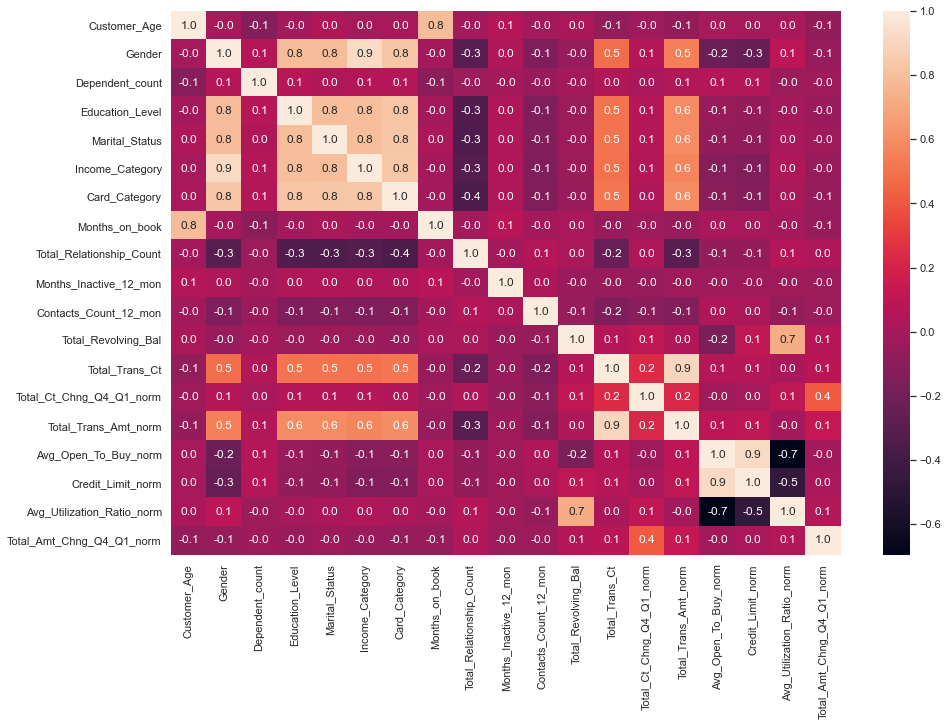

In [123]:
#heat map of correlation of features
correlation_matrix = X.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f')
plt.show()

In [124]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print('Accuracy on the training subset ', (tree.score(X_train, y_train)))
print('Accuracy on the test subset:', (tree.score(X_test, y_test)))

Accuracy on the training subset  1.0
Accuracy on the test subset: 0.9496544916090819


In [125]:
from sklearn.svm import SVC 
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test, y_test)))

The accuracy on the training subset: 0.952
The accuracy on the test subset: 0.916


In [126]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier()
tree.fit(X_train, y_train)

print('Accuracy on the training subset ', (tree.score(X_train, y_train)))
print('Accuracy on the test subset:', (tree.score(X_test, y_test)))

Accuracy on the training subset  1.0
Accuracy on the test subset: 0.9713721618953604


In [127]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train )
print('Accuracy on the training subset ',(knn_model.score(X_train, y_train)))
print('Accuracy on the test subset:', (knn_model.score(X_test, y_test)))

Accuracy on the training subset  0.9311512415349887
Accuracy on the test subset: 0.9081934846989141


In [128]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy on the training subset ',(gnb.score(X_train, y_train)))
print('Accuracy on the test subset:', (gnb.score(X_test, y_test)))

Accuracy on the training subset  0.9122460496613995
Accuracy on the test subset: 0.9042448173741362


In [129]:
#!pip3 install xgboost

In [160]:
#XG Boost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

use_label_encoder=False #Avoid errors

model = XGBClassifier()
model.fit(X_train, y_train)

print('\nAccuracy on the training subset ',(model.score(X_train, y_train)))
print('Accuracy on the test subset:', (model.score(X_test, y_test)))

[22:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy on the training subset  1.0
Accuracy on the test subset: 0.981243830207305


In [ ]:
### It seems that XGBoost is the best classifier with 98% accuracy on the Test subset.

## 5. Hyperparameter Optimization

In [241]:
# Hyperparameter optimization using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [229]:
print('\nAccuracy on the training subset ',(model.score(X_train, y_train)))
print('Accuracy on the test subset:', (model.score(X_test, y_test)))


Accuracy on the training subset  0.9954853273137697
Accuracy on the test subset: 0.9822309970384995


In [246]:
# Manual Model optimization 

model = XGBClassifier(max_depth = 3,
                     subsample = 1,
                     n_estimators = 600, #increase n_estimators
                     learning_rate = 0.05,#decrease learning_rate 
                     min_child_weight = 1,
                     random_state=5,
                     reg_alpha = 0,                    
                     reg_lambda = 1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('\nAccuracy on the training subset ',(model.score(X_train, y_train)))
print('Accuracy on the test subset:', (model.score(X_test, y_test)))

[23:27:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy on the training subset  0.9954853273137697
Accuracy on the test subset: 0.9822309970384995


### Improvements from 0.9815 to 0.9822

## 4. Evaluation and comparisons, various metrics

In [266]:
# Classification report and Confusion matrix for XGBoost

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

y_predict = model.predict(X_test)
class_report = classification_report(y_test, y_predict)

print(class_report)
pd.crosstab(y_test, y_predict)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2583
           1       0.97      0.91      0.94       456

    accuracy                           0.98      3039
   macro avg       0.98      0.95      0.96      3039
weighted avg       0.98      0.98      0.98      3039



col_0,0,1
Attrition_Flag,,
0,2571,12
1,42,414


## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect